## <font size=5> <strong>Cardiovascular Disease Prediction using an Ensemble Learning
Modeling and Predictive Analysis: A Deep Dive into Machine Learning Algorithms and Neural Networks


Rahul Kumar, M.tech AI, NIT Silchar



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## I. Importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/ML_DL projects mtech 3rd sem/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [4]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [5]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [6]:
dataset.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
dataset.sample(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
200   44    1   0       110   197    0        0      177      0      0.0   
219   48    1   0       130   256    1        0      150      1      0.0   
170   56    1   2       130   256    1        0      142      1      0.6   
169   53    1   0       140   203    1        0      155      1      3.1   
30    41    0   1       105   198    0        1      168      0      0.0   

     slope  ca  thal  target  
200      2   1     2       0  
219      2   2     3       0  
170      1   1     1       0  
169      0   0     3       0  
30       2   1     2       1

#### Description

In [8]:
dataset.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [12]:
# Assuming you have a dataset named 'dataset'
# You can use the 'zip' function to iterate over both the column names and descriptions together.

info = [
    "age",
    "1: male, 0: female",
    "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
    "resting blood pressure",
    "serum cholestoral in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (values 0,1,2)",
    "maximum heart rate achieved",
    "exercise-induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "the slope of the peak exercise ST segment",
    "number of major vessels (0-3) colored by fluoroscopy",
    "thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"
]

# Assuming you have a 'dataset' with columns that correspond to the 'info' list
for column_name, description in zip(dataset.columns, info):
    print(f"{column_name}:\t\t\t{description}")


age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise-induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by fluoroscopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


#### Analysing the 'target' variable

In [13]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [15]:
# We have a DataFrame named 'dataset' and a "target" column
correlations = dataset.corr()["target"].abs().sort_values(ascending=False)
print(correlations)


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


####This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

Class 0 Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean    56.601449    0.826087    0.478261  134.398551  251.086957    0.159420   
std      7.962082    0.380416    0.905920   18.729944   49.454614    0.367401   
min     35.000000    0.000000    0.000000  100.000000  131.000000    0.000000   
25%     52.000000    1.000000    0.000000  120.000000  217.250000    0.000000   
50%     58.000000    1.000000    0.000000  130.000000  249.000000    0.000000   
75%     62.000000    1.000000    0.000000  144.750000  283.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  409.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  138.000000  138.000000  138.000000  138.000000  138.000000  138.000000   
mean     0.449275  139.101449    0.550725    1.585507    1.166667    1.166667   
std    

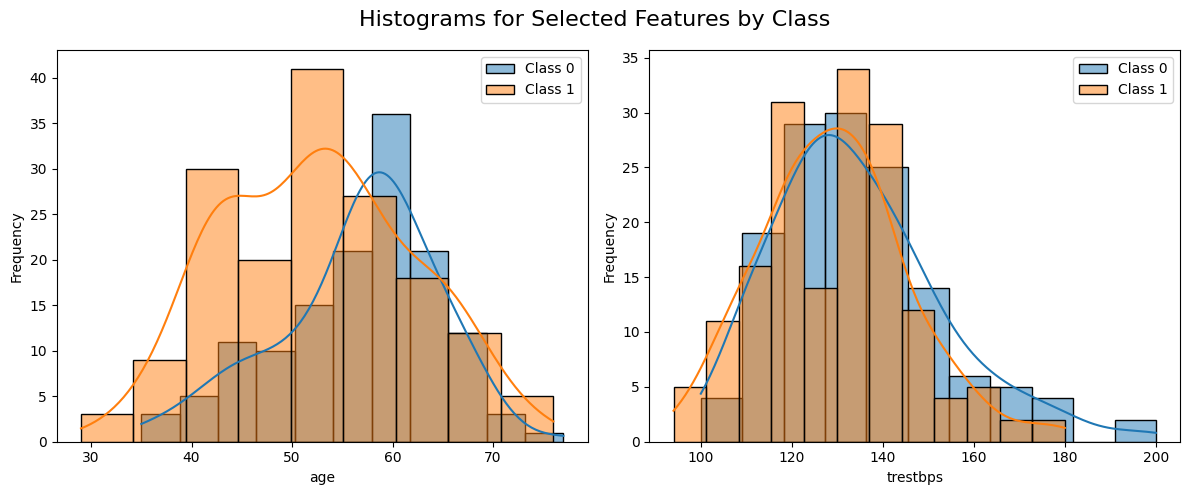

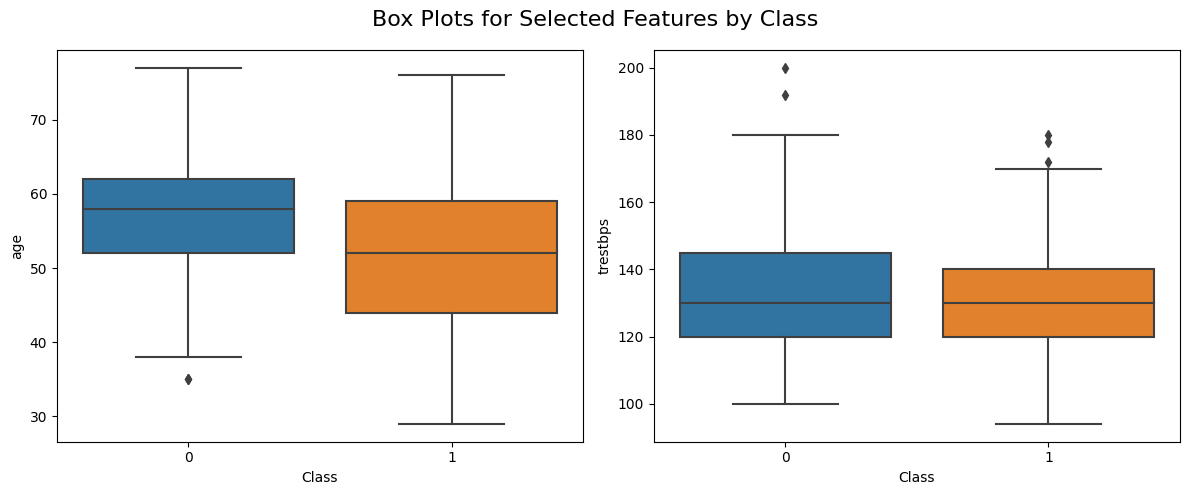

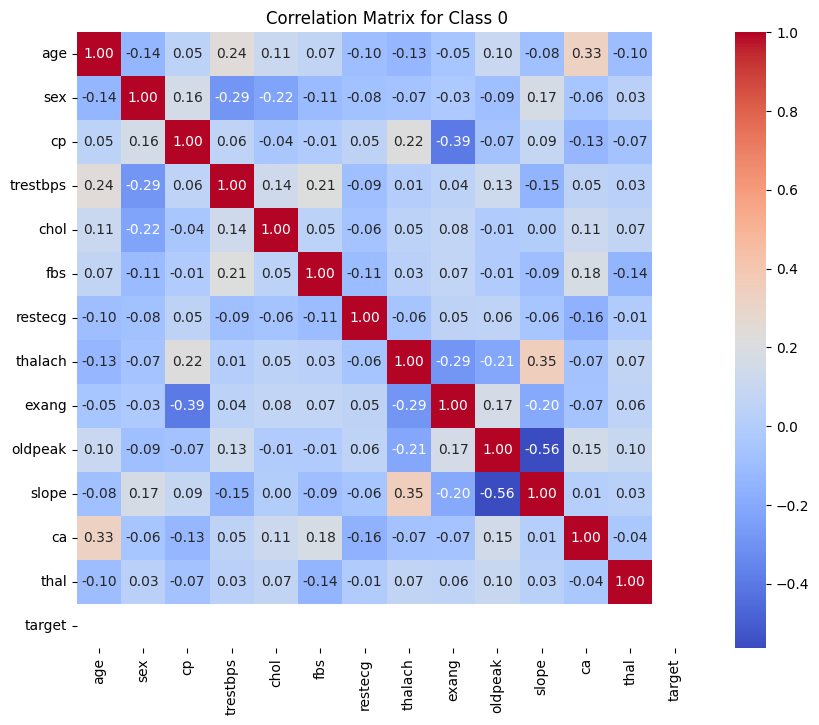

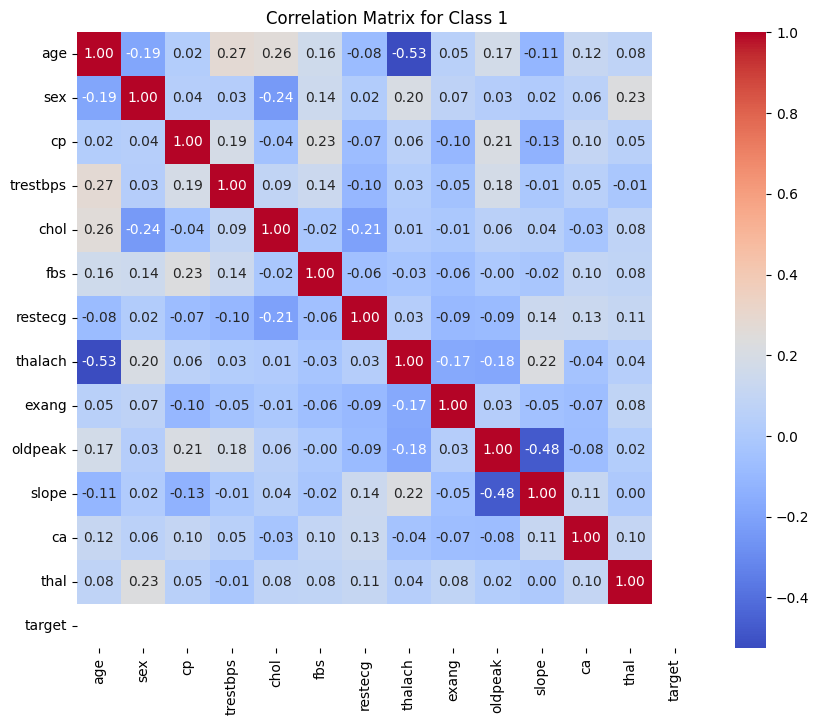

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with a "target" column

# Separate the data into class 0 and class 1
class_0_data = dataset[dataset["target"] == 0]
class_1_data = dataset[dataset["target"] == 1]

# Basic statistics for class 0
print("Class 0 Statistics:")
print(class_0_data.describe())

# Basic statistics for class 1
print("\nClass 1 Statistics:")
print(class_1_data.describe())

# Histograms for selected features (e.g., age, trestbps)
selected_features = ["age", "trestbps"]

plt.figure(figsize=(12, 5))
plt.suptitle("Histograms for Selected Features by Class", fontsize=16)

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(class_0_data[feature], label="Class 0", kde=True)
    sns.histplot(class_1_data[feature], label="Class 1", kde=True)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

# Box plots for selected features
plt.figure(figsize=(12, 5))
plt.suptitle("Box Plots for Selected Features by Class", fontsize=16)

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x="target", y=feature, data=dataset)
    plt.xlabel("Class")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Correlation matrix for class 0
correlation_matrix_class_0 = class_0_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_class_0, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Class 0")
plt.show()

# Correlation matrix for class 1
correlation_matrix_class_1 = class_1_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_class_1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Class 1")
plt.show()


1    165
0    138
Name: target, dtype: int64


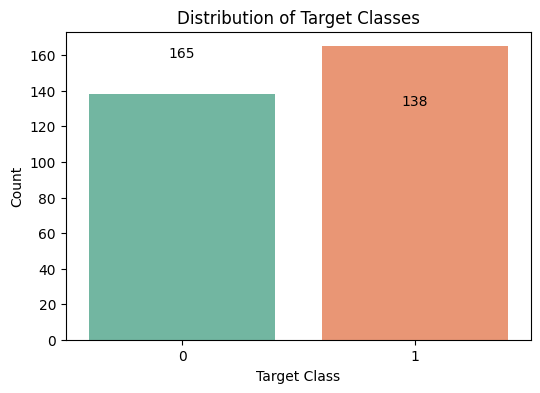

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# We have a DataFrame named 'dataset' with a "target" column

# Count the occurrences of each target class
target_counts = dataset["target"].value_counts()
print(target_counts)

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Set2")
#palette="Set2" sets the color palette for the bars in the plot.

# Add labels and title
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Distribution of Target Classes")

# Add count values above the bars
for index, value in enumerate(target_counts):
    plt.text(index, value, str(value), ha="center", va="top")

plt.show()




In [18]:
# Assuming you have already computed the target_temp variable using value_counts()
total_patients = len(dataset)  # Total number of patients in the dataset

# Calculate the percentage of patients without heart problems (class 0)
percentage_class_0 = (target_counts[0] / total_patients) * 100

# Calculate the percentage of patients with heart problems (class 1)
percentage_class_1 = (target_counts[1] / total_patients) * 100

# Print the percentages
print("Percentage of patients without heart problems: " + str(round(percentage_class_0, 2)) + "%")
print("Percentage of patients with heart problems: " + str(round(percentage_class_1, 2)) + "%")


Percentage of patients without heart problems: 45.54%
Percentage of patients with heart problems: 54.46%


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [19]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

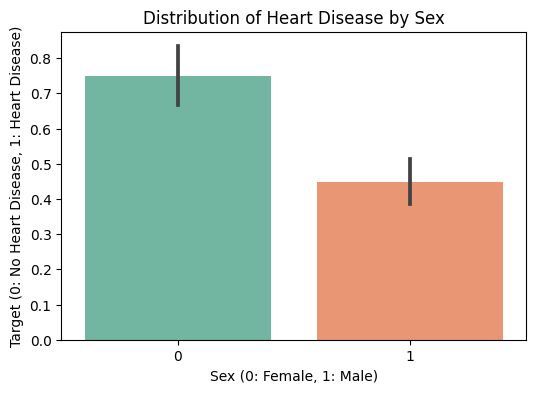

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "sex" and "target" columns

# Create a bar plot to visualize the distribution of "sex" with respect to the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="target", data=dataset, palette="Set2")

# Add labels and a title
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Target (0: No Heart Disease, 1: Heart Disease)")
plt.title("Distribution of Heart Disease by Sex")

plt.show()


##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

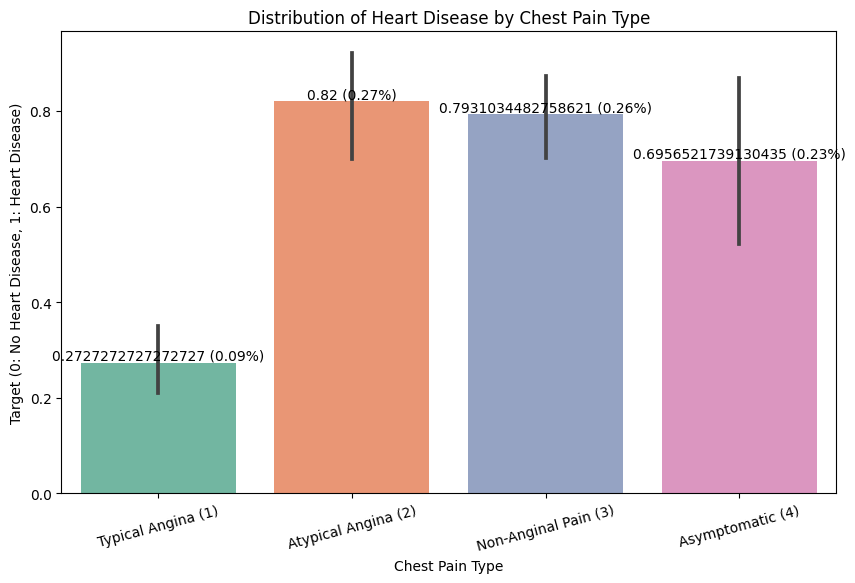

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "cp" and "target" columns

# Create a bar plot to visualize the distribution of "cp" with respect to the target variable
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(x="cp", y="target", data=dataset, palette="Set2", hue_order=[0, 1])

# Customize the x-axis labels for chest pain types
cp_labels = [
    "Typical Angina (1)",
    "Atypical Angina (2)",
    "Non-Anginal Pain (3)",
    "Asymptomatic (4)"
]
ax.set_xticklabels(cp_labels, rotation=15)  # Rotate x-axis labels for better readability

# Add labels and a title
plt.xlabel("Chest Pain Type")
plt.ylabel("Target (0: No Heart Disease, 1: Heart Disease)")
plt.title("Distribution of Heart Disease by Chest Pain Type")

# Annotate bars with count and percentage
total_height = len(dataset)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height / total_height * 100:.2f}%)', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()


In [22]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [23]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [24]:
dataset["fbs"].unique()

array([1, 0])

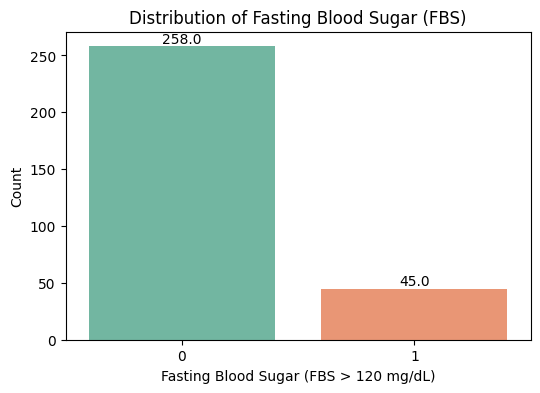

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with a "FBS" column

# Countplot to visualize the distribution of "FBS"
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="fbs", data=dataset, palette="Set2")

# Annotate the bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Fasting Blood Sugar (FBS > 120 mg/dL)")
plt.ylabel("Count")
plt.title("Distribution of Fasting Blood Sugar (FBS)")

plt.show()


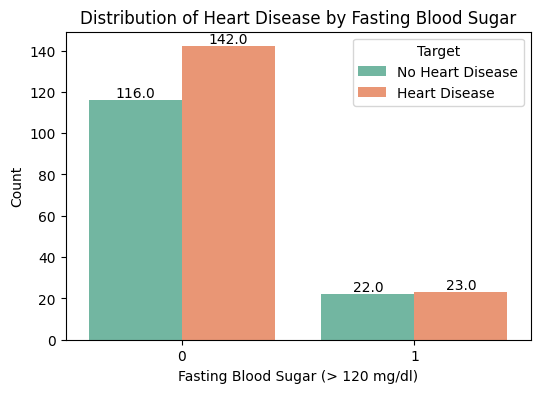

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "fbs" and "target" columns

# Create a countplot to visualize the distribution of "fbs" with respect to the target variable
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="fbs", hue="target", data=dataset, palette="Set2")

# Customize the legend
plt.legend(title="Target", labels=["No Heart Disease", "Heart Disease"])

# Add labels and a title
plt.xlabel("Fasting Blood Sugar (> 120 mg/dl)")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease by Fasting Blood Sugar")

# Annotate the bars with exact counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()


### Analysing the restecg feature

In [27]:
dataset["restecg"].unique()

array([0, 1, 2])

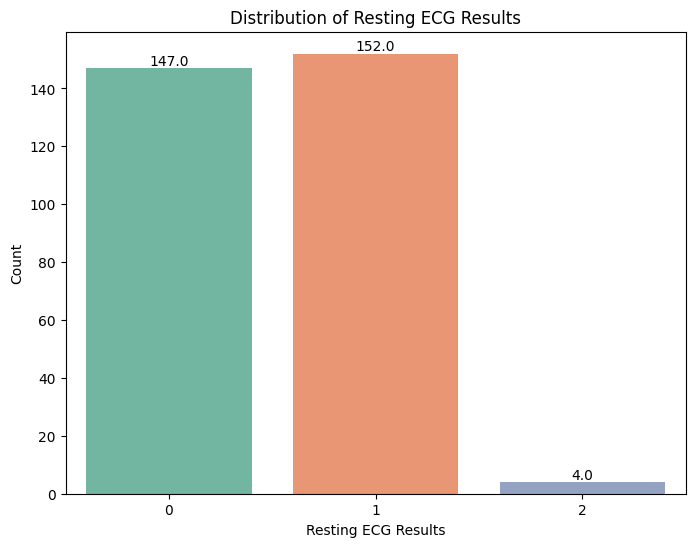

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with a "restecg" column

# Create a countplot to visualize the distribution of "restecg"
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="restecg", data=dataset, palette="Set2")

# Annotate the bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Resting ECG Results")
plt.ylabel("Count")
plt.title("Distribution of Resting ECG Results")
plt.show()


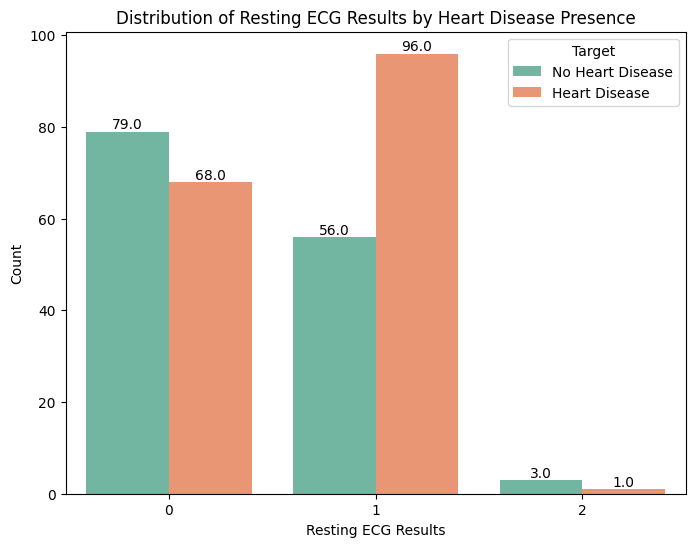

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "restecg" and "target" columns

# Create a countplot to visualize the distribution of "restecg" with respect to the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="restecg", hue="target", data=dataset, palette="Set2")
plt.xlabel("Resting ECG Results")
plt.ylabel("Count")
plt.title("Distribution of Resting ECG Results by Heart Disease Presence")
plt.legend(title="Target", labels=["No Heart Disease", "Heart Disease"])
# Annotate the bars with counts for each category and target class
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()


##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [30]:
dataset["exang"].unique()

array([0, 1])

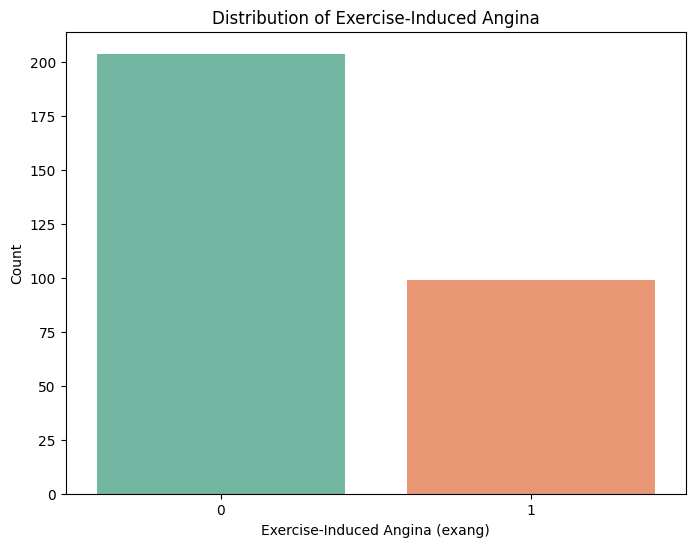

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with an "exang" column

# Create a countplot to visualize the distribution of "exang"
plt.figure(figsize=(8, 6))
sns.countplot(x="exang", data=dataset, palette="Set2")
plt.xlabel("Exercise-Induced Angina (exang)")
plt.ylabel("Count")
plt.title("Distribution of Exercise-Induced Angina")
plt.show()


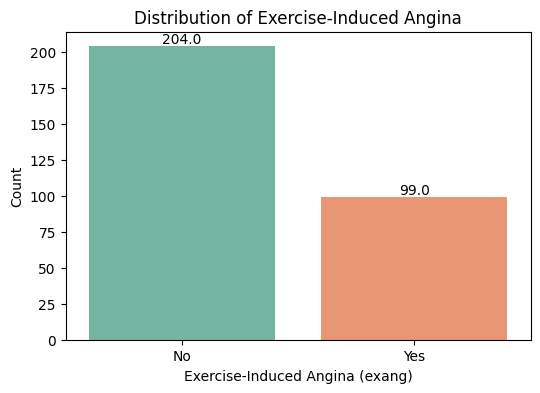

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with an "exang" column

# Create a countplot to visualize the distribution of "exang"
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="exang", data=dataset, palette="Set2")

# Annotate the bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Exercise-Induced Angina (exang)")
plt.ylabel("Count")
plt.title("Distribution of Exercise-Induced Angina")
plt.xticks([0, 1], ["No", "Yes"])  # Customizing x-axis labels
plt.show()


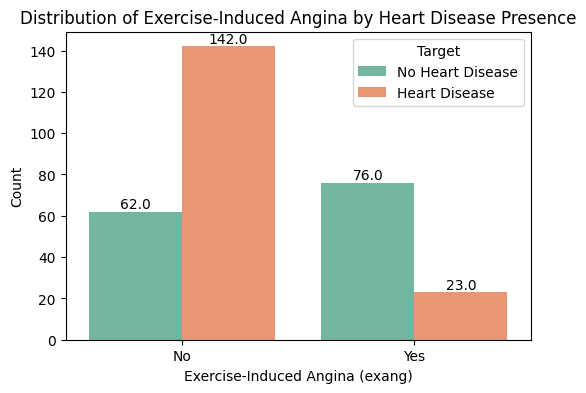

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "exang" and "target" columns

# Create a countplot to visualize the distribution of "exang" with respect to the target variable
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="exang", hue="target", data=dataset, palette="Set2")

# Annotate the bars with counts for each category and target class
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Exercise-Induced Angina (exang)")
plt.ylabel("Count")
plt.title("Distribution of Exercise-Induced Angina by Heart Disease Presence")
plt.xticks([0, 1], ["No", "Yes"])  # Customizing x-axis labels
plt.legend(title="Target", labels=["No Heart Disease", "Heart Disease"])
plt.show()


##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [34]:
dataset["slope"].unique()

array([0, 2, 1])

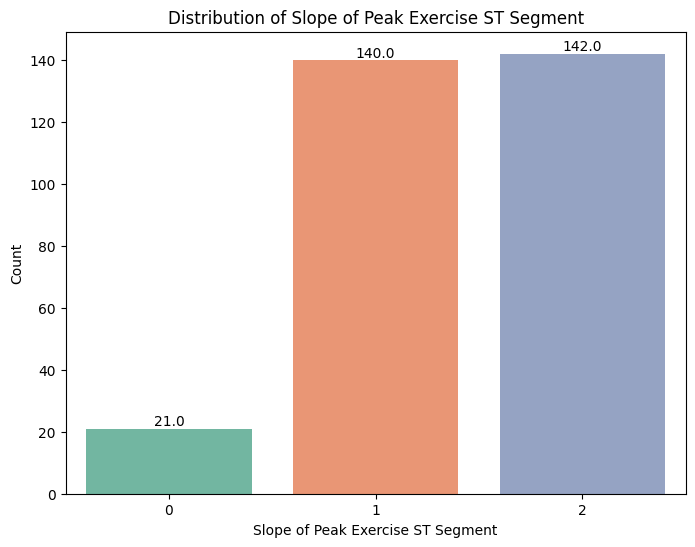

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with a "slope" column

# Create a countplot to visualize the distribution of "slope"
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="slope", data=dataset, palette="Set2")

# Annotate the bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Slope of Peak Exercise ST Segment")
plt.ylabel("Count")
plt.title("Distribution of Slope of Peak Exercise ST Segment")
plt.show()


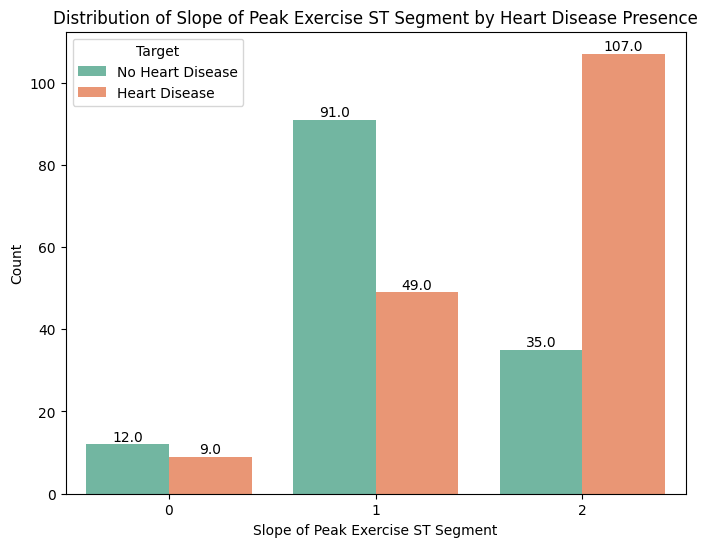

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "slope" and "target" columns

# Create a countplot to visualize the distribution of "slope" with respect to the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="slope", hue="target", data=dataset, palette="Set2")

# Annotate the bars with counts for each category and target class
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Slope of Peak Exercise ST Segment")
plt.ylabel("Count")
plt.title("Distribution of Slope of Peak Exercise ST Segment by Heart Disease Presence")
plt.legend(title="Target", labels=["No Heart Disease", "Heart Disease"])
plt.show()


##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [37]:
#number of major vessels (0-3) colored by flourosopy

In [38]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

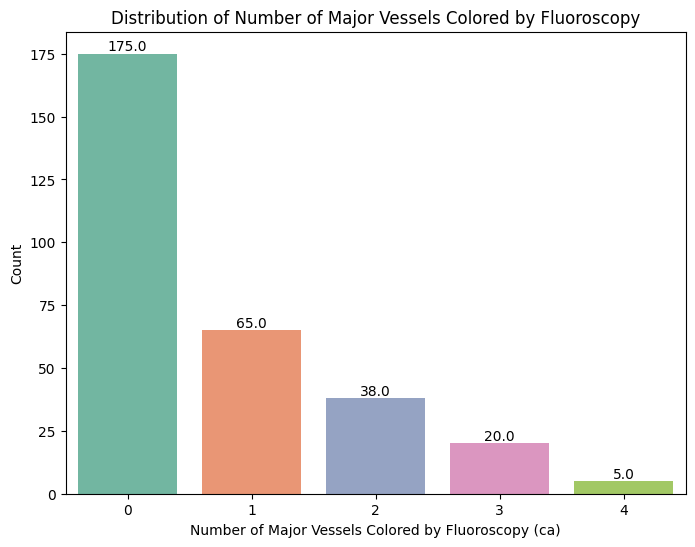

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with a "ca" column

# Create a countplot to visualize the distribution of "ca"
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="ca", data=dataset, palette="Set2")

# Annotate the bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Number of Major Vessels Colored by Fluoroscopy (ca)")
plt.ylabel("Count")
plt.title("Distribution of Number of Major Vessels Colored by Fluoroscopy")
plt.show()


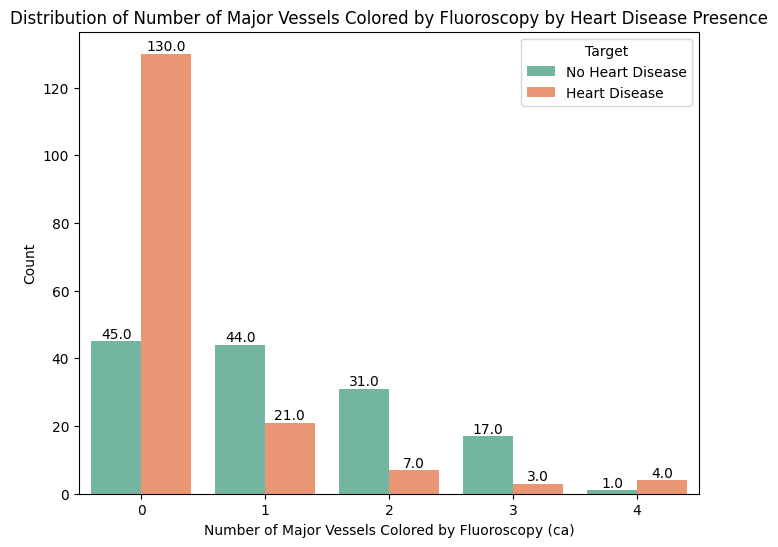

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "ca" and "target" columns

# Create a countplot to visualize the distribution of "ca" with respect to the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="ca", hue="target", data=dataset, palette="Set2")

# Annotate the bars with counts for each category and target class
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Number of Major Vessels Colored by Fluoroscopy (ca)")
plt.ylabel("Count")
plt.title("Distribution of Number of Major Vessels Colored by Fluoroscopy by Heart Disease Presence")
plt.legend(title="Target", labels=["No Heart Disease", "Heart Disease"])
plt.show()


##### ca=0 has astonishingly large number of heart patients

### Analysing the 'thal' feature

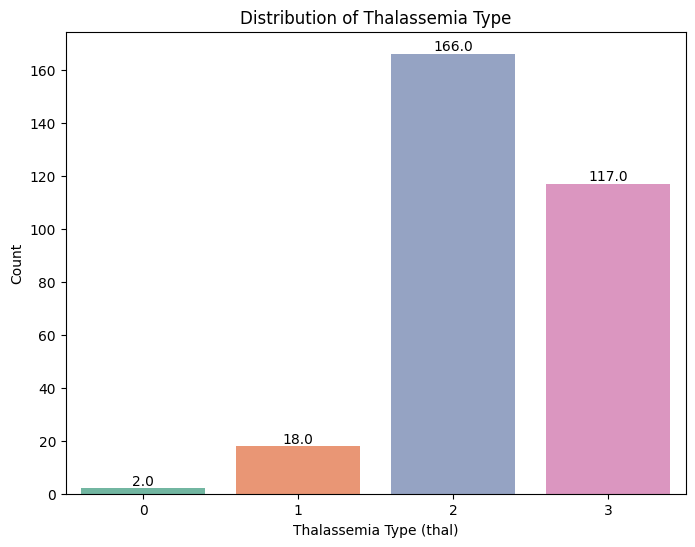

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with a "thal" column

# Create a countplot to visualize the distribution of "thal"
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="thal", data=dataset, palette="Set2")

# Annotate the bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Thalassemia Type (thal)")
plt.ylabel("Count")
plt.title("Distribution of Thalassemia Type")
plt.show()


In [42]:
dataset["thal"].unique()

array([1, 2, 3, 0])

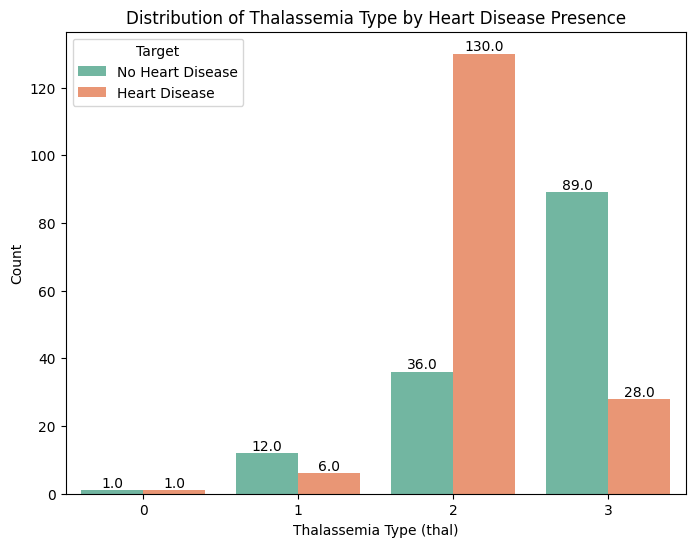

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with "thal" and "target" columns

# Create a countplot to visualize the distribution of "thal" with respect to the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="thal", hue="target", data=dataset, palette="Set2")

# Annotate the bars with counts for each category and target class
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xlabel("Thalassemia Type (thal)")
plt.ylabel("Count")
plt.title("Distribution of Thalassemia Type by Heart Disease Presence")
plt.legend(title="Target", labels=["No Heart Disease", "Heart Disease"])
plt.show()


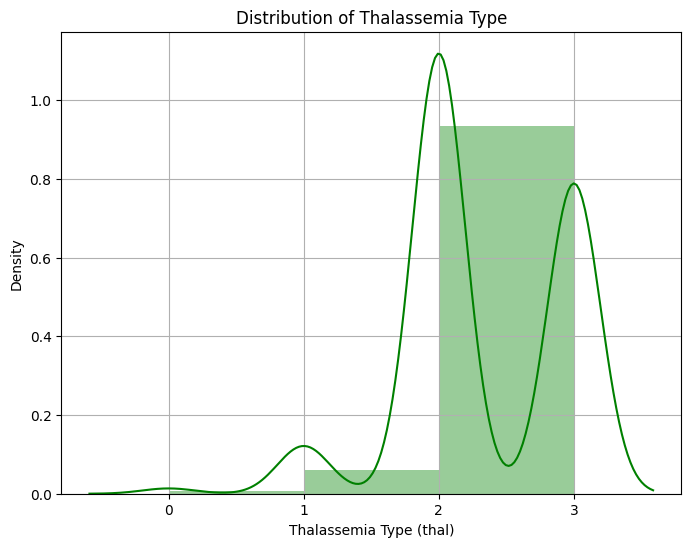

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with a "thal" column

# Create a distplot for the "thal" feature
plt.figure(figsize=(8, 6))
sns.distplot(dataset["thal"], bins=3, kde=True, color="green")  # bins=3 sets the number of bins to match the three categories (3, 6, and 7) of thalassemia type.

plt.xlabel("Thalassemia Type (thal)")
plt.ylabel("Density")
plt.title("Distribution of Thalassemia Type")
plt.grid(True)
plt.show()


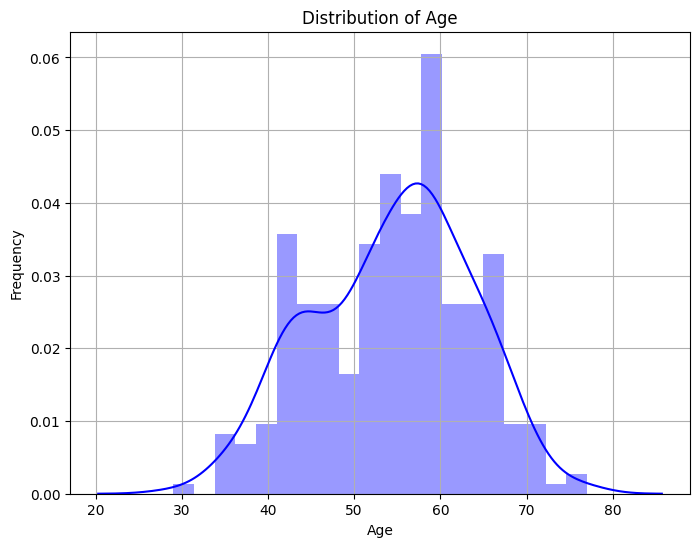

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with an "age" column

# Create a distplot for the "age" feature
plt.figure(figsize=(8, 6))
sns.distplot(dataset["age"], bins=20, kde=True, color="blue")  # sets the number of bins to match the three categories (3, 6, and 7) of thalassemia type

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()


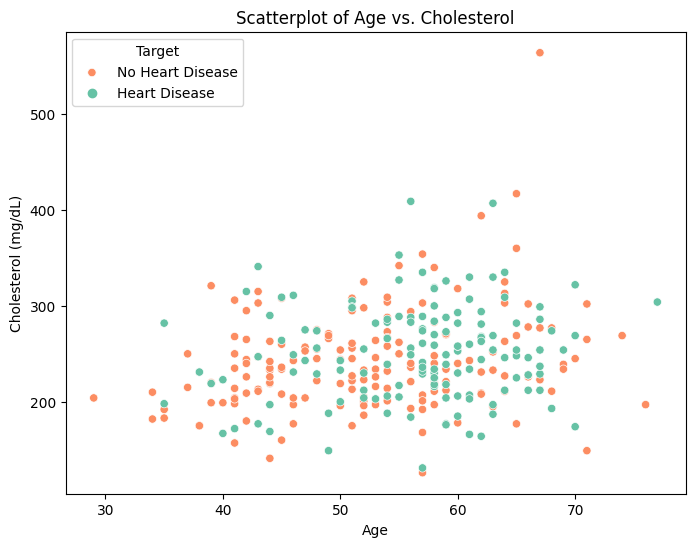

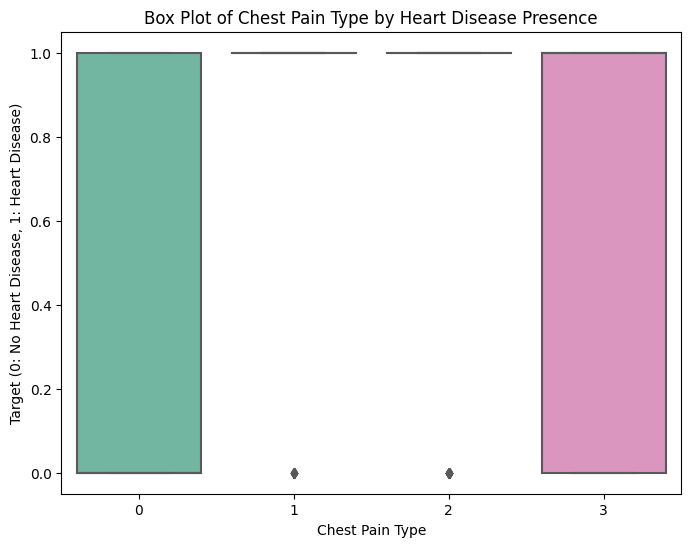

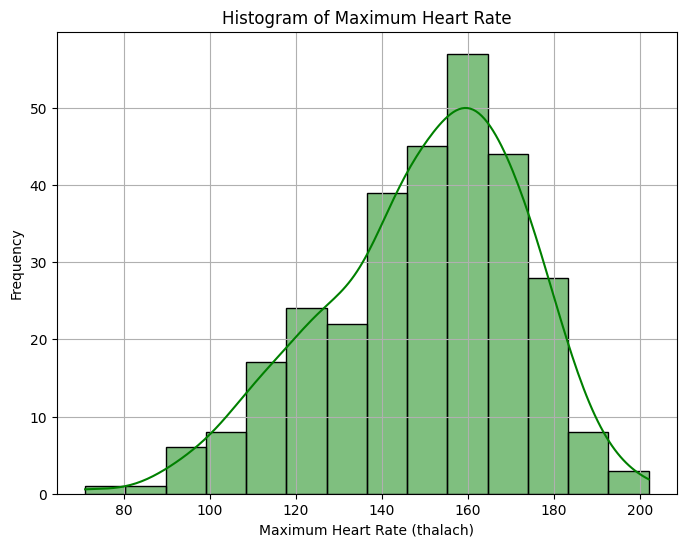

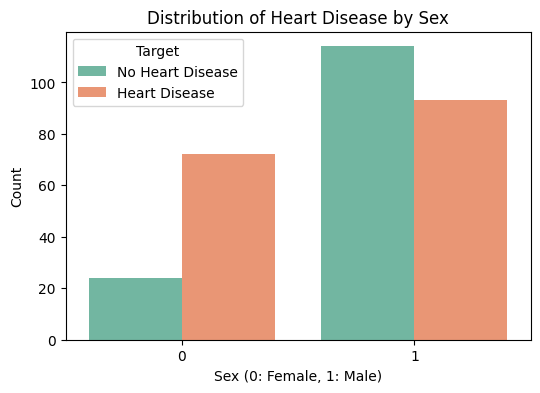

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot of "age" vs. "chol"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x="age", y="chol", hue="target", palette="Set2")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dL)")
plt.title("Scatterplot of Age vs. Cholesterol")
plt.legend(title="Target", labels=["No Heart Disease", "Heart Disease"])
plt.show()

# Box plot of "cp" (Chest Pain Type) by "target"
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x="cp", y="target", palette="Set2")
plt.xlabel("Chest Pain Type")
plt.ylabel("Target (0: No Heart Disease, 1: Heart Disease)")
plt.title("Box Plot of Chest Pain Type by Heart Disease Presence")
plt.show()

# Histogram of "thalach" (Maximum Heart Rate)
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x="thalach", kde=True, color="green")
plt.xlabel("Maximum Heart Rate (thalach)")
plt.ylabel("Frequency")
plt.title("Histogram of Maximum Heart Rate")
plt.grid(True)
plt.show()

# Bar chart of "sex" by "target"
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x="sex", hue="target", palette="Set2")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease by Sex")
plt.legend(title="Target", labels=["No Heart Disease", "Heart Disease"])
plt.show()


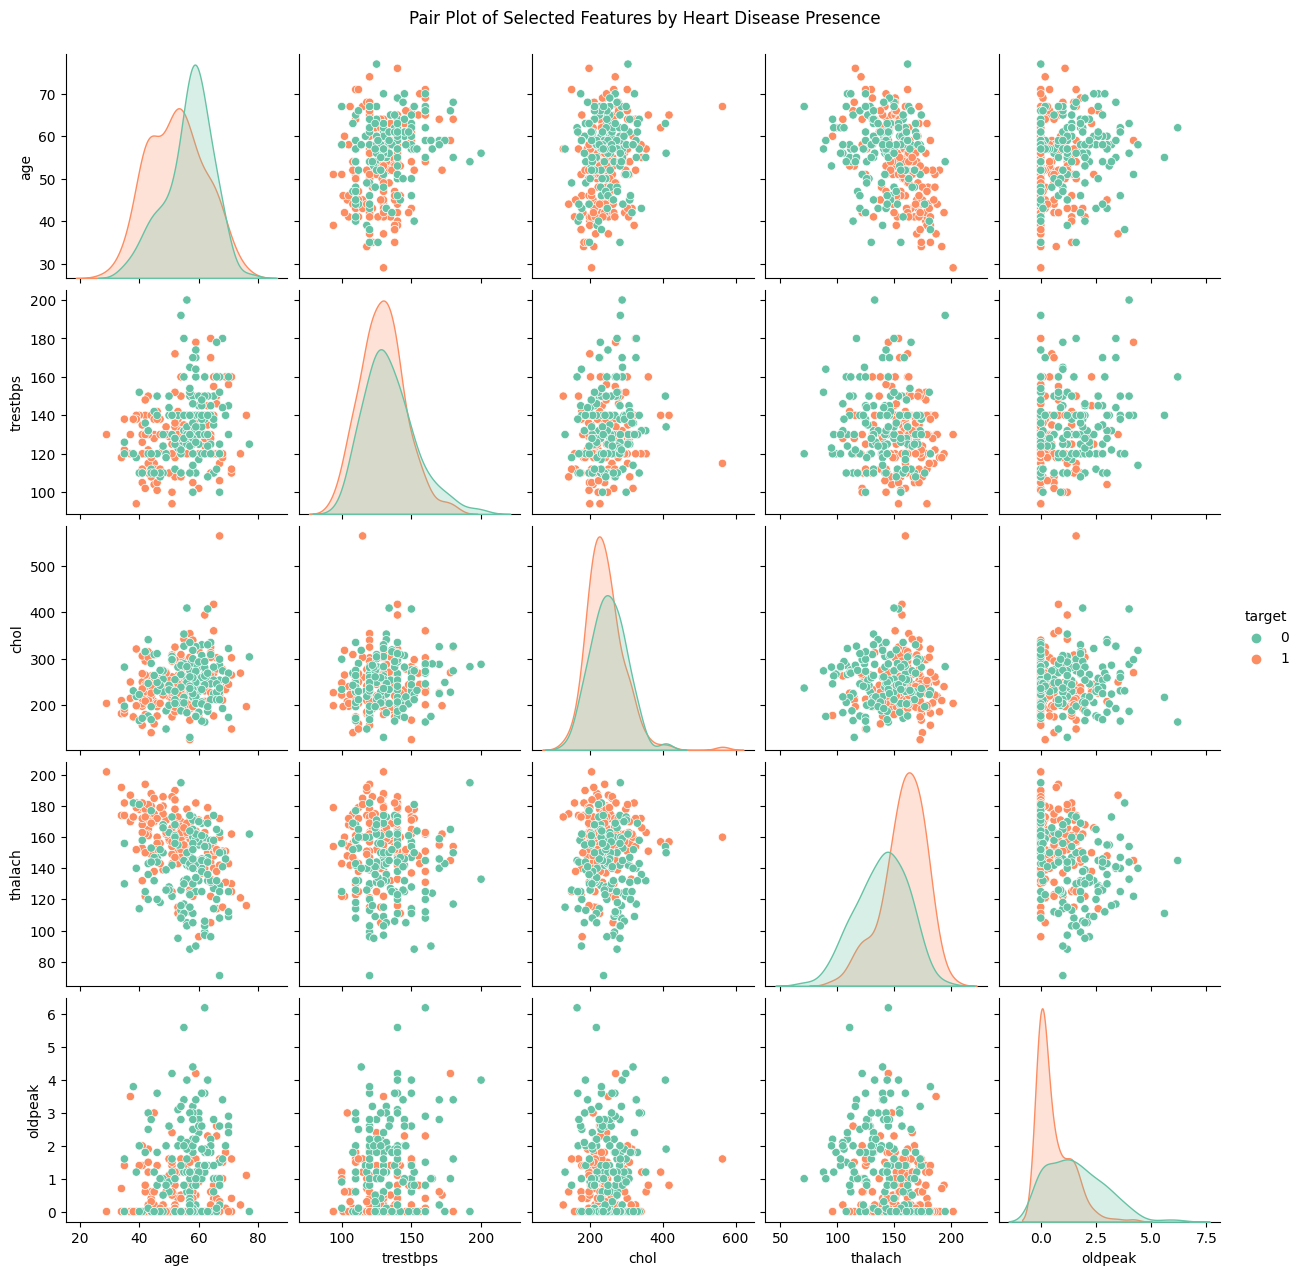

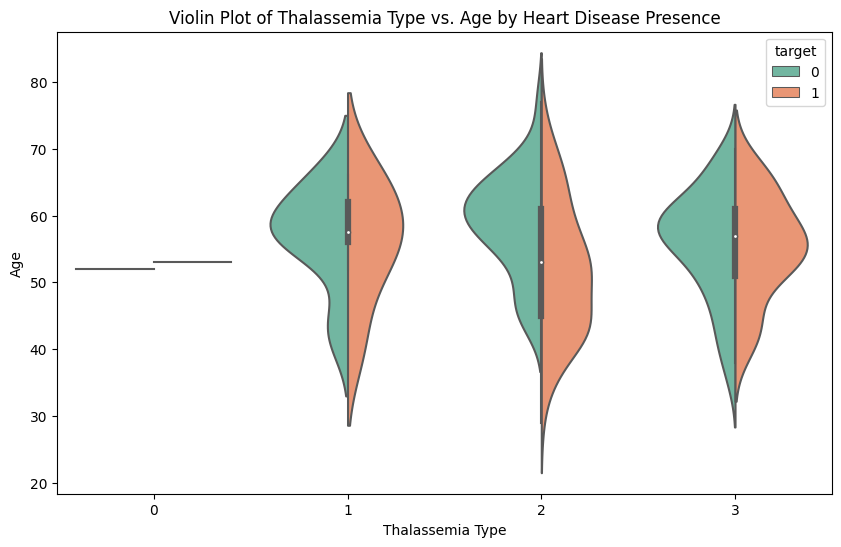

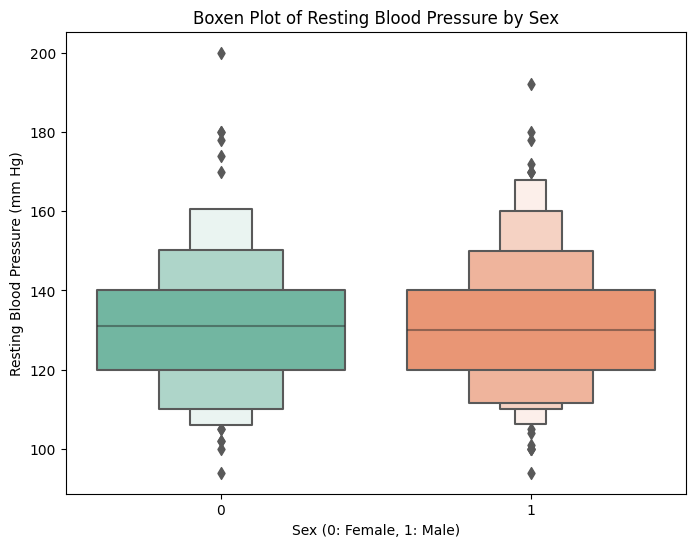

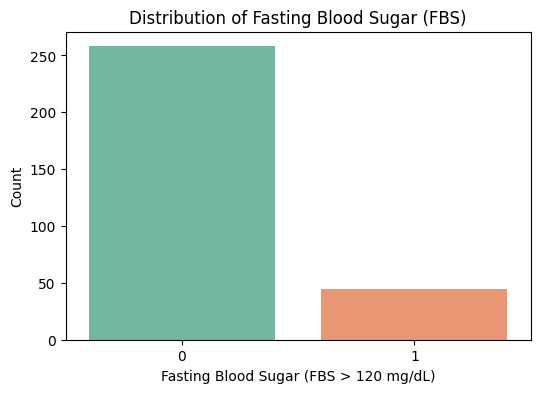

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with various features including 'target'

# Pair plot (scatterplot matrix) for selected features
selected_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
sns.pairplot(data=dataset, vars=selected_features, hue="target", palette="Set2")
plt.suptitle("Pair Plot of Selected Features by Heart Disease Presence", y=1.02)
plt.show()

# Violin plot of "thal" vs. "age" by "target"
plt.figure(figsize=(10, 6))
sns.violinplot(data=dataset, x="thal", y="age", hue="target", palette="Set2", split=True)
plt.xlabel("Thalassemia Type")
plt.ylabel("Age")
plt.title("Violin Plot of Thalassemia Type vs. Age by Heart Disease Presence")
plt.show()

# Boxen plot of "trestbps" (Resting Blood Pressure) by "sex"
plt.figure(figsize=(8, 6))
sns.boxenplot(data=dataset, x="sex", y="trestbps", palette="Set2")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.title("Boxen Plot of Resting Blood Pressure by Sex")
plt.show()

# Bar chart of "fbs" (Fasting Blood Sugar) counts
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x="fbs", palette="Set2")
plt.xlabel("Fasting Blood Sugar (FBS > 120 mg/dL)")
plt.ylabel("Count")
plt.title("Distribution of Fasting Blood Sugar (FBS)")
plt.show()


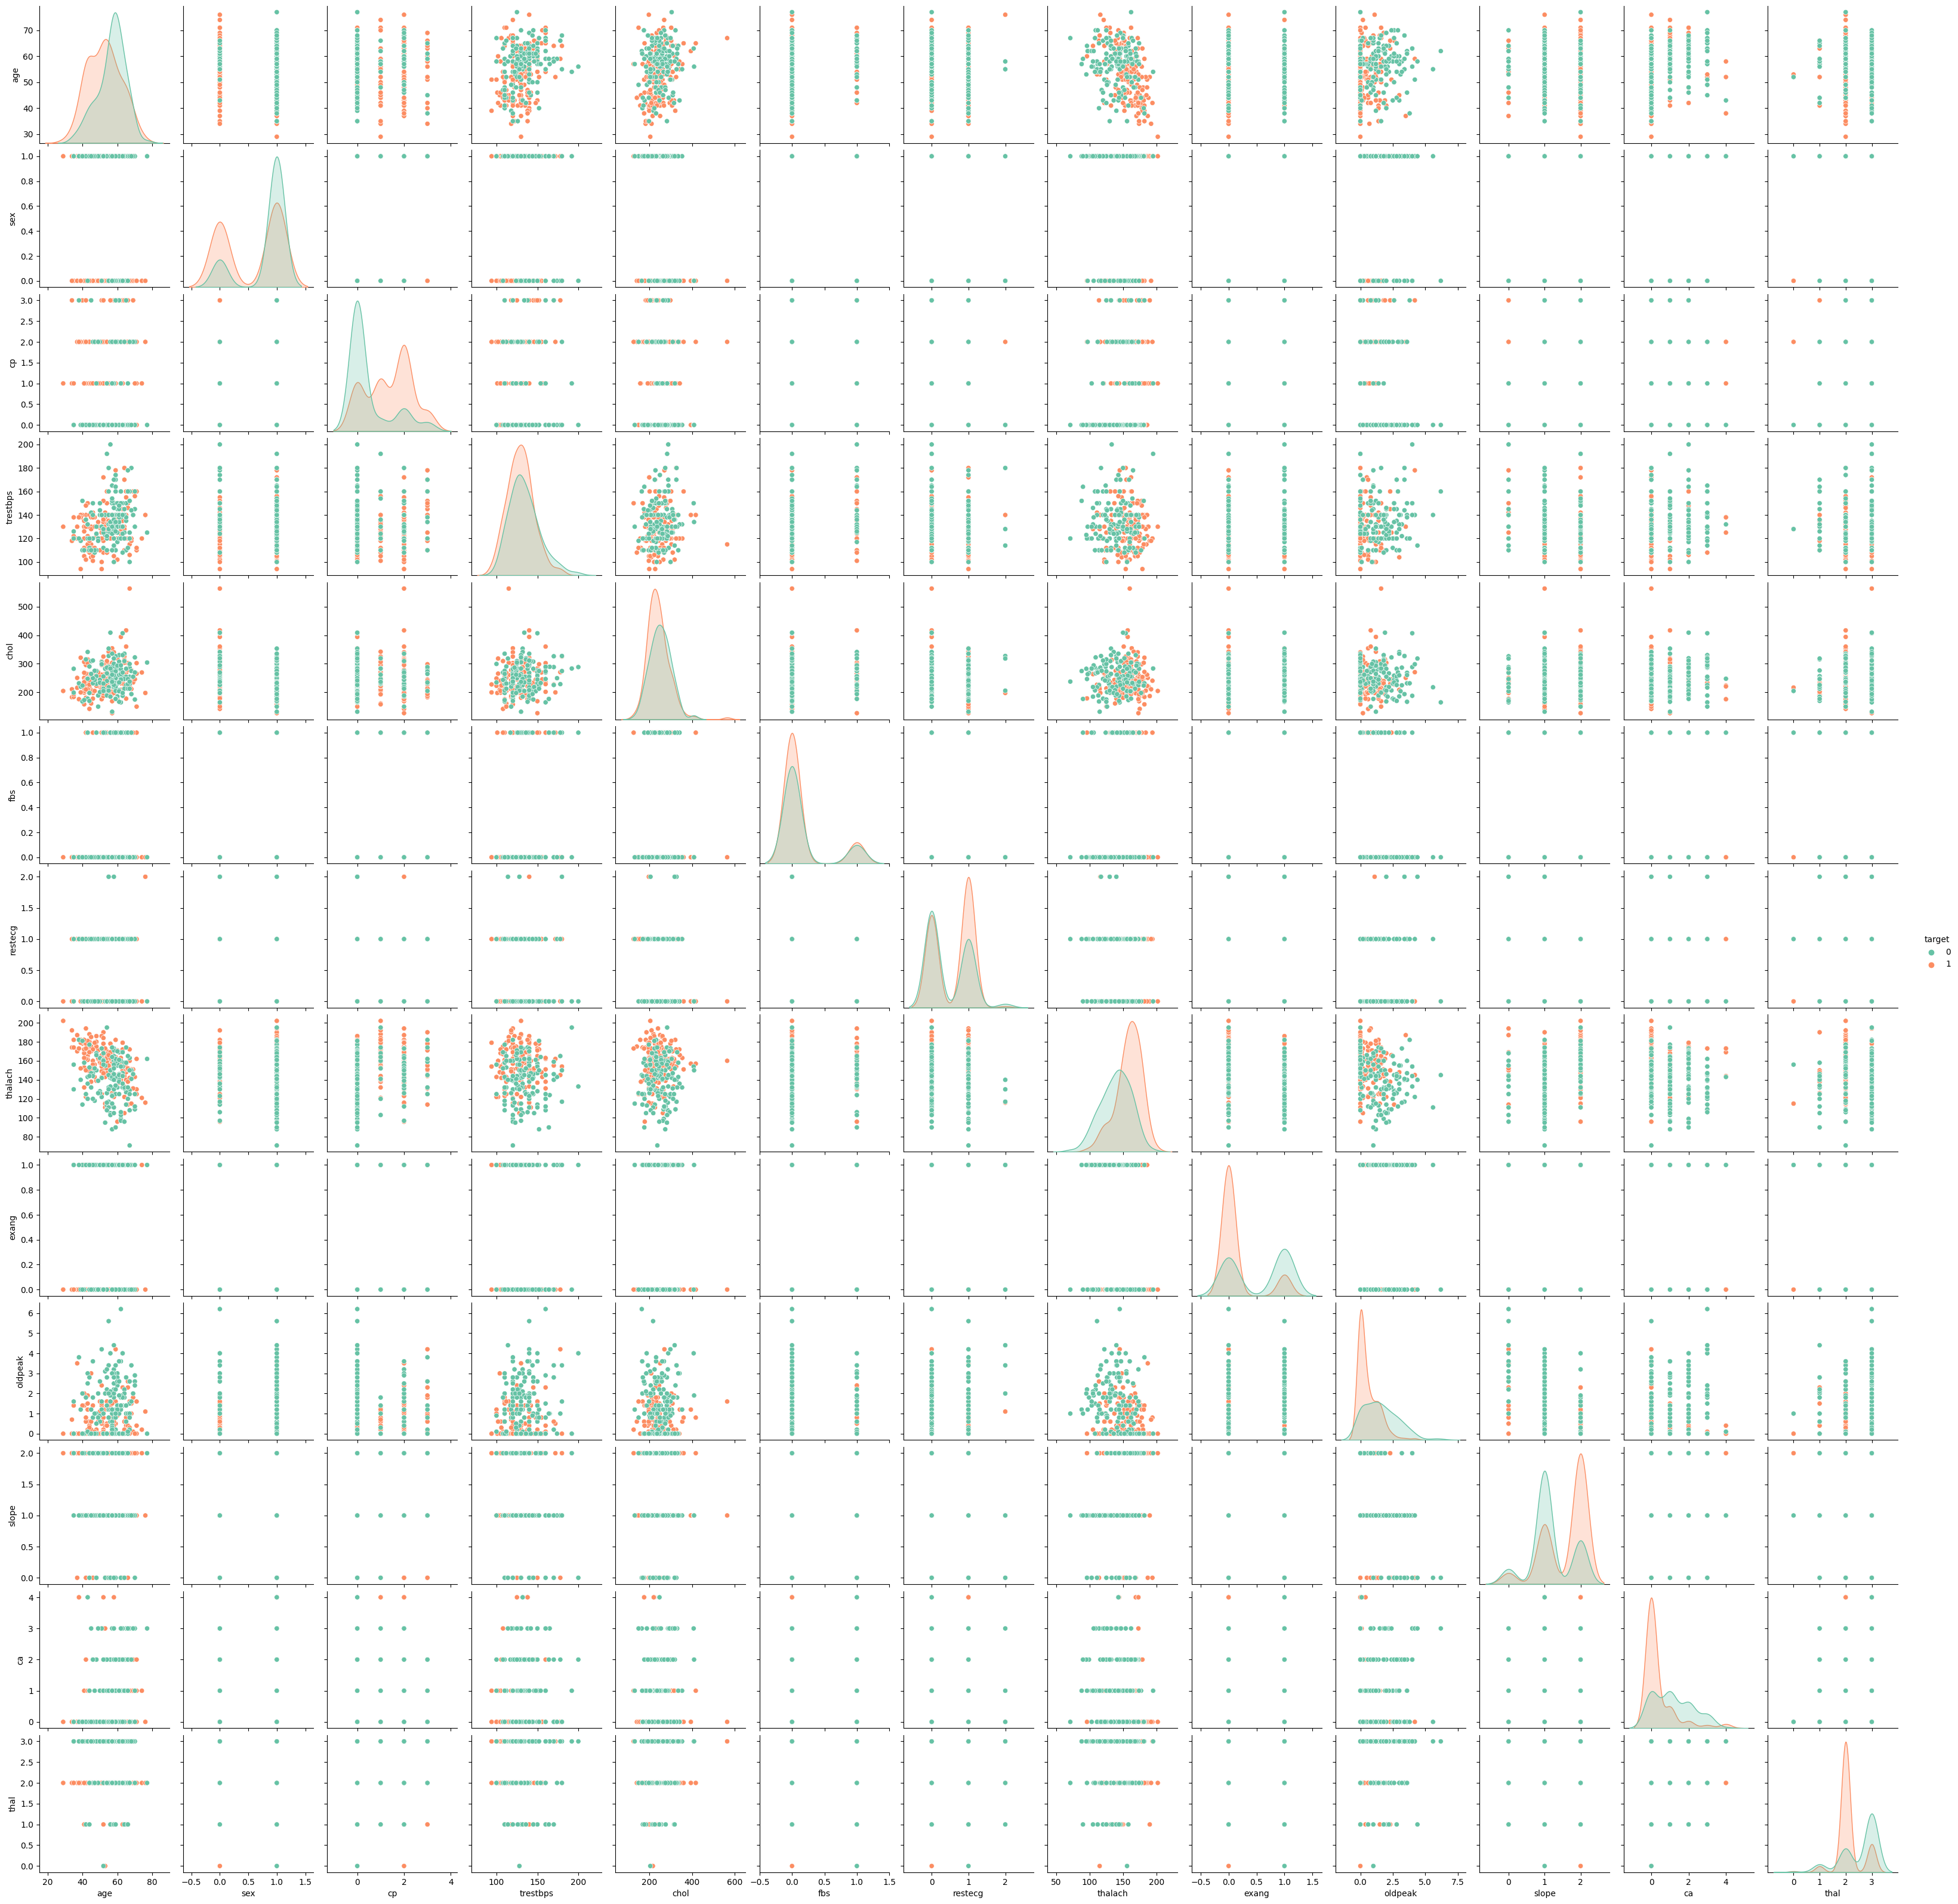

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with multiple features including "target"
# Specify the columns you want to include in the pair plot
columns_to_include = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

# Create a pair plot for the selected columns
sns.pairplot(dataset[columns_to_include], hue="target", palette="Set2", diag_kind="kde")

plt.show()


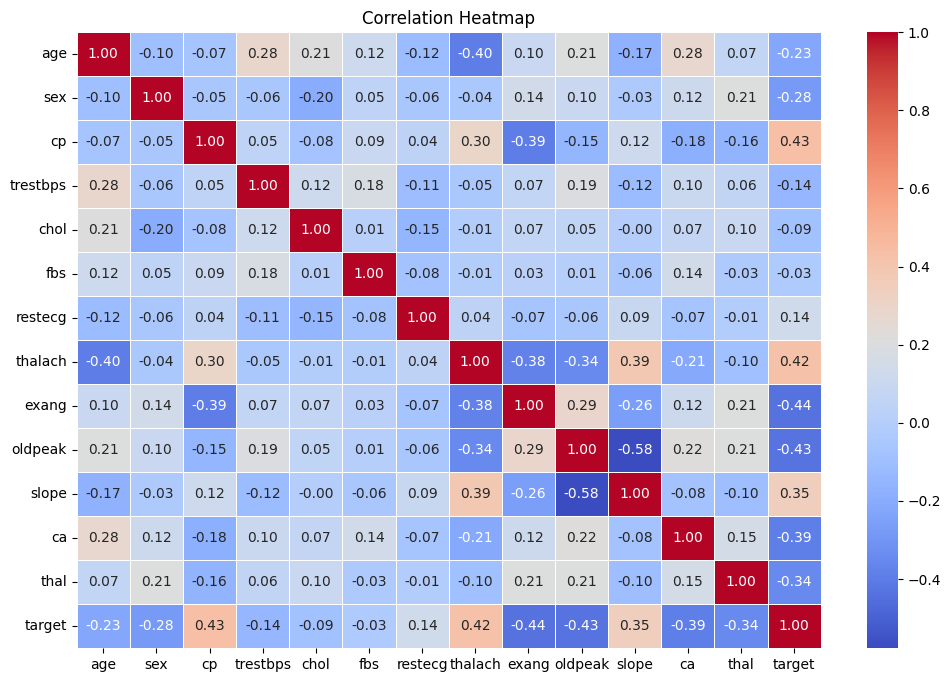

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset' with multiple numerical features
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


A heatmap is often used to visualize a correlation matrix. It uses colors to represent the strength and direction of correlations.
Warmer colors (e.g., red) indicate positive correlations, while cooler colors (e.g., blue) indicate negative correlations.

## IV. Train Test split

In [50]:
# Import the necessary library for train-test split
from sklearn.model_selection import train_test_split

# Define predictors and target variable
predictors = dataset.drop("target", axis=1)  # Features (excluding the "target" column)
target = dataset["target"]  # Target variable

# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [51]:
X_train.shape

(242, 13)

In [52]:
X_test.shape

(61, 13)

In [53]:
Y_train.shape

(242,)

In [54]:
Y_test.shape

(61,)

## V. Model Training

*****************LOGISTIC REGRESSION********************************

In [55]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

k = 5  # Number of folds

####Perform k-fold cross-validation and obtain accuracy scores
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

In this step:

model: The machine learning model you want to evaluate (Logistic Regression in this case).

X: Your feature matrix.

y: Your target vector.

cv=k: This parameter specifies the number of folds (k) for cross-validation.

scoring='accuracy': You can choose the evaluation metric you want to use. In this case, we're using accuracy.

In [56]:
# Perform k-fold cross-validation and obtain accuracy scores
scores = cross_val_score(model, X_train, Y_train, cv=k, scoring='accuracy')

In [57]:
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(mean_accuracy)
print(std_accuracy)

0.8102891156462585
0.04990156444923352


The Logistic Regression model achieved an average accuracy of 0.81 with a standard deviation of 0.04 across the 5 folds of cross-validation."

This means that, on average, the model correctly predicted the class labels in 81% of cases, and the accuracy scores were relatively consistent (standard deviation of 0.04).

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Create and train the Logistic Regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Make predictions on the test dataset
Y_pred = lr.predict(X_test)

# Calculate accuracy on the test dataset
accuracy = accuracy_score(Y_pred, Y_test)

# Print the accuracy
print(f"Accuracy on the test dataset: {accuracy:.2f}")



Accuracy on the test dataset: 0.85


#### other evaluation metrics and domain-specific requirements when assessing the overall performance of the model.
 to compute various evaluation metrics, including the confusion matrix, precision, recall, F1-score, ROC curve, AUC, precision-recall curve, mean absolute error (MAE), mean squared error (MSE), R-squared (R2), and log loss for a Logistic Regression model.


In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, log_loss

# Make predictions on the test dataset
Y_pred = lr.predict(X_test)
Y_prob = lr.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Confusion Matrix
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(confusion)

# Precision, Recall, F1-Score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = roc_auc_score(Y_test, Y_prob)
print("ROC Curve:")
print(f"AUC: {roc_auc:.2f}")

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(Y_test, Y_prob)
pr_auc = auc(recall, precision)
print("Precision-Recall Curve:")
print(f"AUC: {pr_auc:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_prob)
print(f"MAE: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_prob)
print(f"MSE: {mse:.2f}")

# R-squared (R2)
r2 = r2_score(Y_test, Y_prob)
print(f"R-squared: {r2:.2f}")

# Log Loss (Cross-Entropy Loss)
logloss = log_loss(Y_test, Y_prob)
print(f"Log Loss: {logloss:.2f}")


Confusion Matrix:
[[22  5]
 [ 4 30]]
Precision: 0.86
Recall: 0.88
F1-Score: 0.87
ROC Curve:
AUC: 0.91
Precision-Recall Curve:
AUC: 0.91
MAE: 0.24
MSE: 0.11
R-squared: 0.54
Log Loss: 0.38


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report


def evaluate_classification_metrics(Y_test, Y_pred, Y_prob):
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Precision, Recall, F1-Score
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = roc_auc_score(Y_test, Y_prob)
    print("ROC Curve:")
    print(f"AUC: {roc_auc:.2f}")

    # Precision-Recall Curve and AUC
    precision, recall, _ = precision_recall_curve(Y_test, Y_prob)
    pr_auc = auc(recall, precision)
    print("Precision-Recall Curve:")
    print(f"AUC: {pr_auc:.2f}")

    # Confusion Matrix
    confusion = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:")
    print(confusion)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(Y_test, Y_prob)
    print(f"MAE: {mae:.2f}")

    # Mean Squared Error (MSE)
    mse = mean_squared_error(Y_test, Y_prob)
    print(f"MSE: {mse:.2f}")

    # R-squared (R2)
    r2 = r2_score(Y_test, Y_prob)
    print(f"R-squared: {r2:.2f}")

    # Log Loss (Cross-Entropy Loss)
    logloss = log_loss(Y_test, Y_prob)
    print(f"Log Loss: {logloss:.2f}")

    # Classification Report
    report = classification_report(Y_test, Y_pred)
    print("Classification Report:")
    print(report)

# Usage:
# Replace Y_test, Y_pred, and Y_prob with your actual values
# Make predictions on the test dataset
Y_pred = lr.predict(X_test)
Y_prob = lr.predict_proba(X_test)[:, 1]  # Probability estimates for positive class
evaluate_classification_metrics(Y_test, Y_pred, Y_prob)


Accuracy: 0.85
Precision: 0.86
Recall: 0.88
F1-Score: 0.87
ROC Curve:
AUC: 0.91
Precision-Recall Curve:
AUC: 0.91
Confusion Matrix:
[[22  5]
 [ 4 30]]
MAE: 0.24
MSE: 0.11
R-squared: 0.54
Log Loss: 0.38
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [61]:
from sklearn.metrics import classification_report

# Make predictions on the test dataset
Y_pred = lr.predict(X_test)

# Generate a classification report
report = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Matthews Correlation Coefficient (MCC): MCC is a balanced measure that takes into account true and false positives and negatives. It ranges from -1 to 1, with higher values indicating better performance.

In [62]:
from sklearn.metrics import matthews_corrcoef

# Make predictions on the test dataset
Y_pred = lr.predict(X_test)

# Calculate MCC
mcc = matthews_corrcoef(Y_test, Y_pred)

# Print the MCC score
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")


Matthews Correlation Coefficient (MCC): 0.70


In [63]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset and split it into X_train and Y_train

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("SVM", SVC()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

k = 5  # Number of folds

# Iterate through the models and perform cross-validation
for model_name, model in models:
    scores = cross_val_score(model, X_train, Y_train, cv=k, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)

    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Standard Deviation of Accuracy: {std_accuracy}")
    print()


Model: Logistic Regression
Mean Accuracy: 0.8102891156462585
Standard Deviation of Accuracy: 0.04990156444923352

Model: Naive Bayes
Mean Accuracy: 0.8103741496598639
Standard Deviation of Accuracy: 0.0659126060188056

Model: SVM
Mean Accuracy: 0.6285714285714284
Standard Deviation of Accuracy: 0.08003078636765364

Model: K-Nearest Neighbors
Mean Accuracy: 0.619812925170068
Standard Deviation of Accuracy: 0.010205498767807842



In [64]:
pip install xgboost


In [65]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [66]:
Y_pred_xgb.shape

(61,)

In [67]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


In [68]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Lists to store results
model_names = []
cv_mean_accuracies = []
test_accuracies = []


# Define a list of classifiers
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("SVM", SVC()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

k = 5  # Number of folds

# Iterate through the models
for model_name, model in models:
    # Perform k-fold cross-validation
    scores = cross_val_score(model, X_train, Y_train, cv=k, scoring='accuracy')
    mean_accuracy = np.mean(scores)

    # Train the model on the entire training dataset
    model.fit(X_train, Y_train)

    # Make predictions on the test dataset
    Y_pred = model.predict(X_test)

    # Calculate the accuracy on the test dataset
    test_accuracy = accuracy_score(Y_test, Y_pred)


    # Append results to lists
    model_names.append(model_name)
    cv_mean_accuracies.append(mean_accuracy)
    test_accuracies.append(test_accuracy)


    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Cross-Validation Mean Accuracy: {mean_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print()


Model: Logistic Regression
Cross-Validation Mean Accuracy: 0.8102891156462585
Test Accuracy: 0.8524590163934426

Model: Naive Bayes
Cross-Validation Mean Accuracy: 0.8103741496598639
Test Accuracy: 0.8524590163934426

Model: SVM
Cross-Validation Mean Accuracy: 0.6285714285714284
Test Accuracy: 0.6885245901639344

Model: K-Nearest Neighbors
Cross-Validation Mean Accuracy: 0.619812925170068
Test Accuracy: 0.639344262295082

Model: Decision Tree
Cross-Validation Mean Accuracy: 0.7562925170068027
Test Accuracy: 0.7868852459016393

Model: Random Forest
Cross-Validation Mean Accuracy: 0.8225340136054422
Test Accuracy: 0.8688524590163934

Model: Gradient Boosting
Cross-Validation Mean Accuracy: 0.8103741496598639
Test Accuracy: 0.8032786885245902



In [69]:
model_names

['Logistic Regression',
 'Naive Bayes',
 'SVM',
 'K-Nearest Neighbors',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting']

In [70]:
cv_mean_accuracies

[0.8102891156462585,
 0.8103741496598639,
 0.6285714285714284,
 0.619812925170068,
 0.7562925170068027,
 0.8225340136054422,
 0.8103741496598639]

In [71]:
test_accuracies

[0.8524590163934426,
 0.8524590163934426,
 0.6885245901639344,
 0.639344262295082,
 0.7868852459016393,
 0.8688524590163934,
 0.8032786885245902]

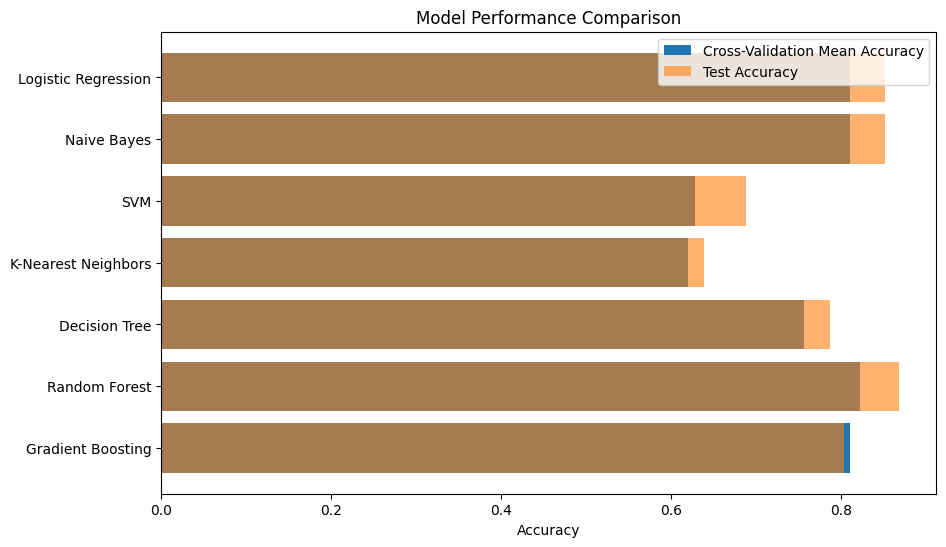

In [72]:
# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_mean_accuracies, label='Cross-Validation Mean Accuracy')
plt.barh(model_names, test_accuracies, alpha=0.6, label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis to have the best model at the top
plt.show()

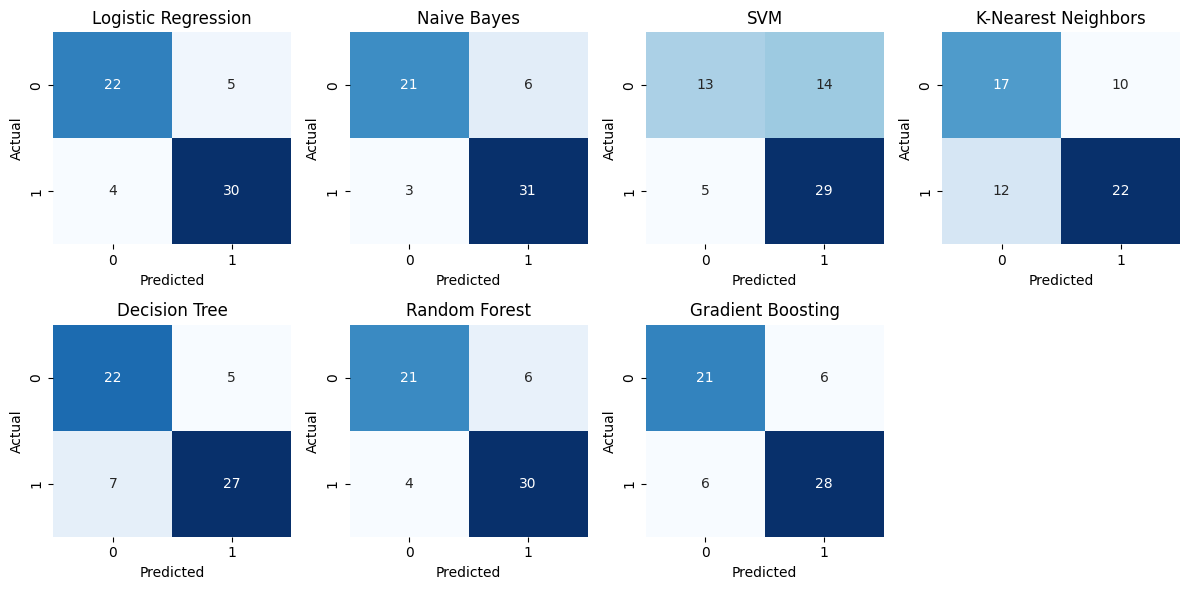

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i, (model_name, model) in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    plt.subplot(2, 4, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(model_name)

plt.tight_layout()
plt.show()


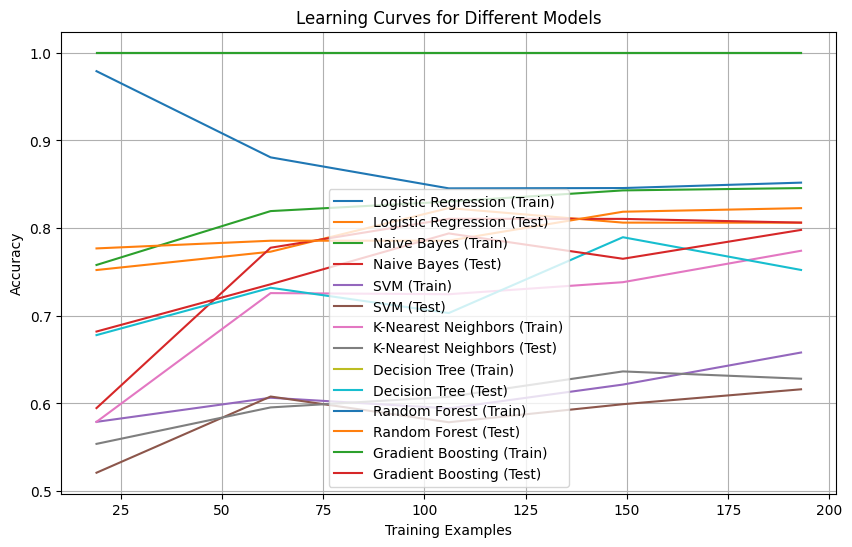

In [74]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for model_name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, Y_train, cv=k, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label=f'{model_name} (Train)')
    plt.plot(train_sizes, test_scores_mean, label=f'{model_name} (Test)')

plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Different Models')
plt.legend()
plt.grid()
plt.show()


SVM does not support probability estimation, skipping ROC curve.


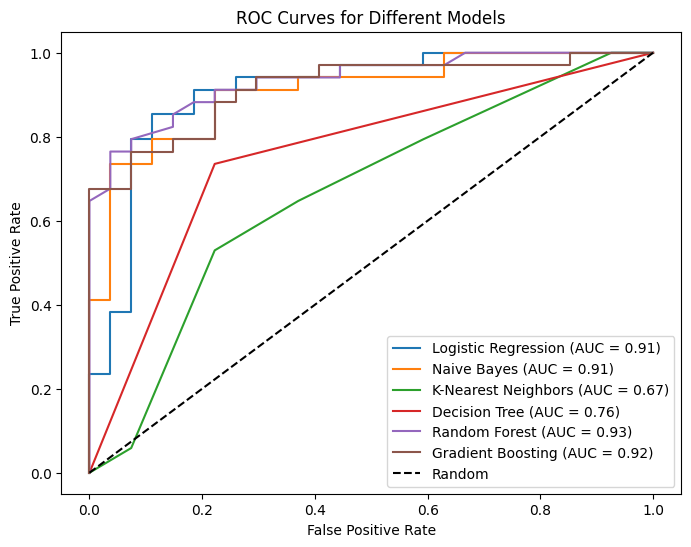

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for model_name, model in models:
    try:
        # Check if the model supports probability estimation
        if hasattr(model, "predict_proba"):
            model.fit(X_train, Y_train)
            Y_pred_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
            auc = roc_auc_score(Y_test, Y_pred_proba)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
        else:
            print(f"{model_name} does not support probability estimation, skipping ROC curve.")
    except Exception as e:
        print(f"Error while processing {model_name}: {str(e)}")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()


### Neural Network

In [76]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [77]:
# Define predictors and target variable
predictors = dataset.drop("target", axis=1)  # Features (excluding the "target" column)
target = dataset["target"]  # Target variable

# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

In [78]:
X_train.shape[1]

13

In [79]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [80]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [81]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split=0.2)


Epoch 1/500
7/7 [==============================] - 2s 81ms/step - loss: 20.1091 - accuracy: 0.4404 - val_loss: 1.7116 - val_accuracy: 0.4898
Epoch 2/500
7/7 [==============================] - 0s 29ms/step - loss: 4.0082 - accuracy: 0.5596 - val_loss: 3.2903 - val_accuracy: 0.4694
Epoch 3/500
7/7 [==============================] - 0s 24ms/step - loss: 2.2594 - accuracy: 0.5181 - val_loss: 1.5077 - val_accuracy: 0.5102
Epoch 4/500
7/7 [==============================] - 0s 15ms/step - loss: 1.8378 - accuracy: 0.5389 - val_loss: 2.5364 - val_accuracy: 0.4694
Epoch 5/500
7/7 [==============================] - 0s 17ms/step - loss: 1.2291 - accuracy: 0.6477 - val_loss: 1.0238 - val_accuracy: 0.6122
Epoch 6/500
7/7 [==============================] - 0s 19ms/step - loss: 0.8877 - accuracy: 0.6062 - val_loss: 0.8662 - val_accuracy: 0.6122
Epoch 7/500
7/7 [==============================] - 0s 20ms/step - loss: 1.0130 - accuracy: 0.5803 - val_loss: 0.7584 - val_accuracy: 0.6327
Epoch 8/500
7/7 [==

In [82]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy}")


2/2 [==============================] - 0s 8ms/step - loss: 0.6672 - accuracy: 0.7541
Test Accuracy: 0.7540983557701111


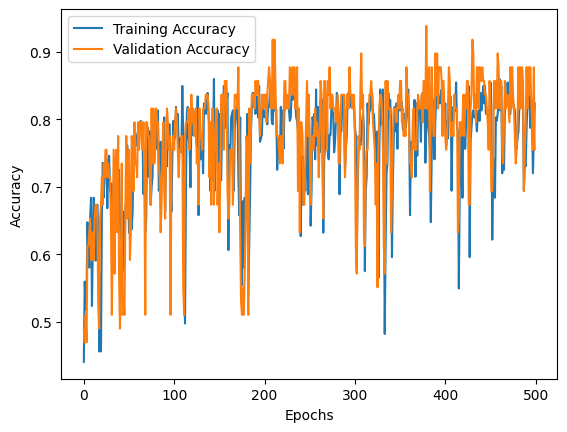

In [83]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [84]:
predictions = model.predict(X_test)


2/2 [==============================] - 0s 6ms/step


In [90]:
predictions[5]

array([0.9436968], dtype=float32)

random forest has good result as compare to other algorithms <br> <br>

In [91]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Define predictors and target variable
predictors = dataset.drop("target", axis=1)  # Features (excluding the "target" column)
target = dataset["target"]  # Target variable

# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a complex neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=500, batch_size=64, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy on the test dataset
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Epoch 1/500
4/4 [==============================] - 3s 136ms/step - loss: 0.8764 - accuracy: 0.5544 - val_loss: 0.6604 - val_accuracy: 0.7959
Epoch 2/500
4/4 [==============================] - 0s 38ms/step - loss: 0.7723 - accuracy: 0.5959 - val_loss: 0.6365 - val_accuracy: 0.8163
Epoch 3/500
4/4 [==============================] - 0s 23ms/step - loss: 0.6679 - accuracy: 0.6477 - val_loss: 0.6176 - val_accuracy: 0.8163
Epoch 4/500
4/4 [==============================] - 0s 22ms/step - loss: 0.5932 - accuracy: 0.7047 - val_loss: 0.6004 - val_accuracy: 0.8163
Epoch 5/500
4/4 [==============================] - 0s 21ms/step - loss: 0.6379 - accuracy: 0.7098 - val_loss: 0.5849 - val_accuracy: 0.7959
Epoch 6/500
4/4 [==============================] - 0s 25ms/step - loss: 0.5351 - accuracy: 0.7150 - val_loss: 0.5714 - val_accuracy: 0.7755
Epoch 7/500
4/4 [==============================] - 0s 29ms/step - loss: 0.4991 - accuracy: 0.7409 - val_loss: 0.5582 - val_accuracy: 0.7755
Epoch 8/500
4/4 [==

In [92]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define predictors and target variable
predictors = dataset.drop("target", axis=1)  # Features (excluding the "target" column)
target = dataset["target"]  # Target variable

# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple feedforward neural network (FNN) model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=800, batch_size=32, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the test dataset
predictions = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy on the test dataset
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Epoch 1/800
7/7 [==============================] - 3s 110ms/step - loss: 0.6752 - accuracy: 0.5699 - val_loss: 0.5682 - val_accuracy: 0.7347
Epoch 2/800
7/7 [==============================] - 0s 22ms/step - loss: 0.5474 - accuracy: 0.8031 - val_loss: 0.5125 - val_accuracy: 0.8163
Epoch 3/800
7/7 [==============================] - 0s 15ms/step - loss: 0.4800 - accuracy: 0.8290 - val_loss: 0.4684 - val_accuracy: 0.8367
Epoch 4/800
7/7 [==============================] - 0s 23ms/step - loss: 0.4362 - accuracy: 0.8290 - val_loss: 0.4383 - val_accuracy: 0.8571
Epoch 5/800
7/7 [==============================] - 0s 26ms/step - loss: 0.4018 - accuracy: 0.8342 - val_loss: 0.4107 - val_accuracy: 0.8367
Epoch 6/800
7/7 [==============================] - 0s 15ms/step - loss: 0.3753 - accuracy: 0.8394 - val_loss: 0.3933 - val_accuracy: 0.8367
Epoch 7/800
7/7 [==============================] - 0s 13ms/step - loss: 0.3583 - accuracy: 0.8446 - val_loss: 0.3888 - val_accuracy: 0.8367
Epoch 8/800
7/7 [==

In this project, we embarked on a journey to build and evaluate various machine learning and neural network models for a classification task. We explored a range of algorithms, including Logistic Regression, Naive Bayes, Support Vector Machine, K-Nearest Neighbors, Decision Trees, Random Forest, Gradient Boosting, Xgboost,  and even a deep learning model with few architectures.